**Question** 3

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv("compremakeup.csv")

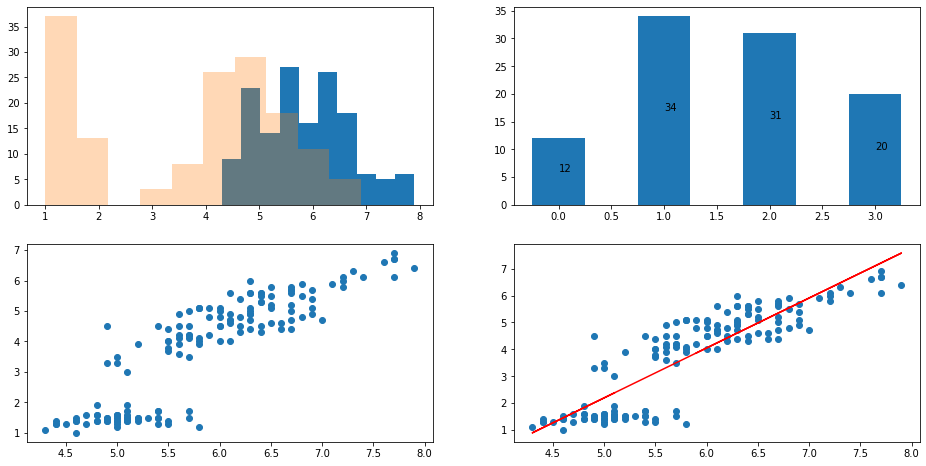

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].hist(data["Col-Num-Cont-1"])
ax[0,0].hist(data["Col-Num-Cont-2"],alpha=0.3)

bar = ax[0,1].bar(data["Col-Num-Cat-1"],data["Col-Num-Cont-1"],width=0.5)
for i in bar:
  yval = i.get_height()
  ax[0,1].text(i.get_x()+i.get_width()/2,yval/2,int(yval))

ax[1,0].scatter(data["Col-Num-Cont-2"],data["Col-Num-Cont-3"])
ax[1,1].scatter(data["Col-Num-Cont-2"],data["Col-Num-Cont-3"])

m, b = np.polyfit(data["Col-Num-Cont-2"], data["Col-Num-Cont-3"], 1)
ax[1,1].plot(data["Col-Num-Cont-2"], m*data["Col-Num-Cont-3"]+b, color='red')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


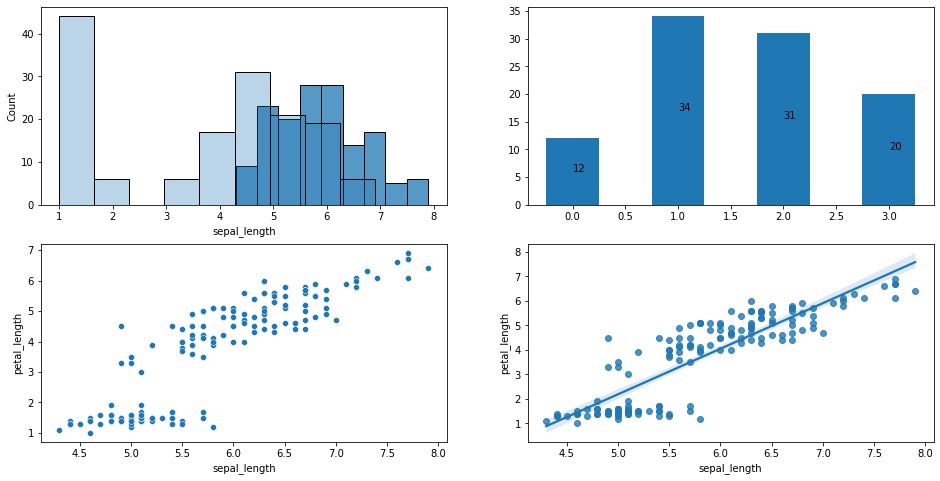

In [ ]:
fig, ax = plt.subplots(2,2,figsize=(16,8))
sns.histplot(data["Col-Num-Cont-1"],ax=ax[0][0])
sns.histplot(data["Col-Num-Cont-2"],ax=ax[0][0],alpha=0.3)

bar = ax[0,1].bar(data["Col-Num-Cat-1"],data["Col-Num-Cont-1"],width=0.5)
for i in bar:
  yval = i.get_height()
  ax[0,1].text(i.get_x()+i.get_width()/2,yval/2,int(yval))

sns.scatterplot(data["Col-Num-Cont-2"],data["Col-Num-Cont-3"],ax=ax[1][0])

sns.regplot(data["Col-Num-Cont-2"],data["Col-Num-Cont-3"],ax=ax[1][1])

plt.show()


# **Question 7**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/books.csv")

ParserError: ignored

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/AIP-codedb/public/main/data/books.csv",error_bad_lines=False)
data.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


(13714, 10)

In [ ]:
data.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '# num_pages', 'ratings_count', 'text_reviews_count'],
      dtype='object')

In [ ]:
data.drop(['bookID','isbn','isbn13'],axis = 1,inplace=True)
data.isna().sum()
#use of dropna
#remove outliers
from scipy import stats
# data = data[np.abs(stats.zscore(data))<=3]
data = data[(np.abs(stats.zscore(data[['average_rating', '# num_pages', 'ratings_count', 'text_reviews_count']]))<=3).all(axis=1)]

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
# num_pages           0
ratings_count         0
text_reviews_count    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13714 entries, 0 to 13713
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13714 non-null  int64  
 1   title               13714 non-null  object 
 2   authors             13714 non-null  object 
 3   average_rating      13714 non-null  float64
 4   isbn                13714 non-null  object 
 5   isbn13              13714 non-null  int64  
 6   language_code       13714 non-null  object 
 7   # num_pages         13714 non-null  int64  
 8   ratings_count       13714 non-null  int64  
 9   text_reviews_count  13714 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


In [ ]:
data.shape

(13252, 10)

In [ ]:
ax =data.groupby('language_code')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('language_code').plot.bar(figsize=(14,8),rot=0)
plt.title('language code',fontsize=20)
plt.xticks(fontsize=15)
for p in ax.patches:
    ax.annotate(str(p.get_height()),(p.get_x()+0.1,p.get_height()+100))



# •	Number of books in all the different languages

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


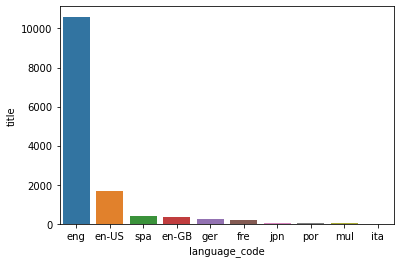

In [ ]:
df1 = (data.groupby('language_code')['title'].count().reset_index()
      .sort_values('title',ascending=False).head(10).set_index('language_code'))
sns.barplot(df1.index,df1.title)

# •	Top 10 most rated books

In [ ]:
most_rated = data.sort_values('ratings_count',ascending=False).head(10).set_index('title')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


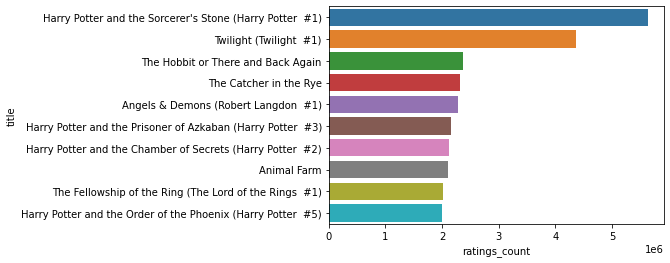

In [ ]:
sns.barplot(most_rated.ratings_count,most_rated.index)

# •	Top 10 authors with the greatest number of books published

In [ ]:
author_of_most_books = (data.groupby('authors')['title'].count().reset_index()
.sort_values('title',ascending=False).head(10)
.set_index('authors'))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


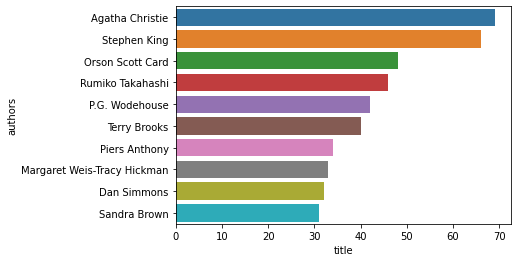

In [ ]:
sns.barplot(author_of_most_books.title,author_of_most_books.index)

# •	Average rating distribution of all books

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Average rating')

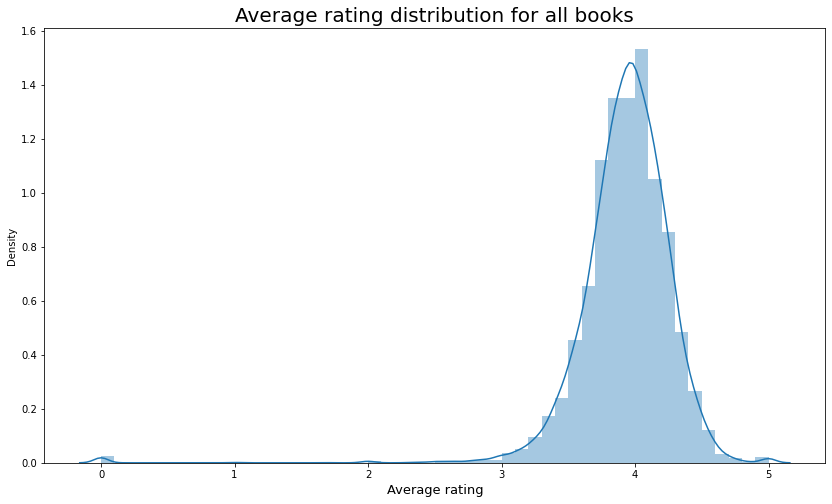

In [ ]:
data.average_rating = data.average_rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(data['average_rating'],ax=ax,kind="kde")
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)

# •	Top 10 books with the greatest number of pages

In [ ]:
most_pages = (data.sort_values('# num_pages',ascending=False)
.head(10).set_index('title'))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


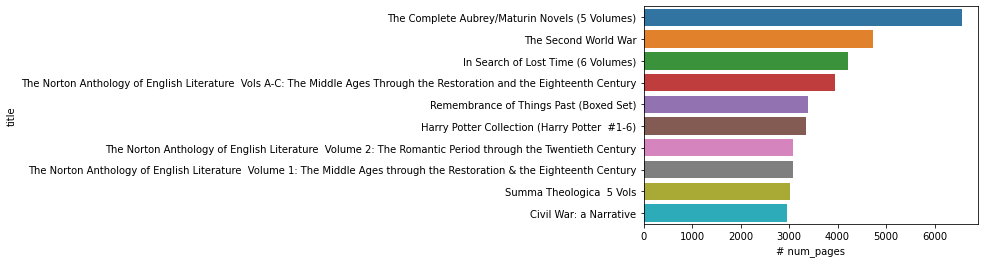

In [ ]:
sns.barplot(most_pages["# num_pages"],most_pages.index)

# •	Top 10 highly rated authors

In [ ]:
highly_rated_author =data[data['average_rating']>4.4]
highly_rated_author = highly_rated_author.groupby('authors')['title'].count().reset_index().sort_values('title',ascending=False).head(10).set_index('authors')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33618 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24029 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24344 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37057 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20161 missing from current font.
  font.set_

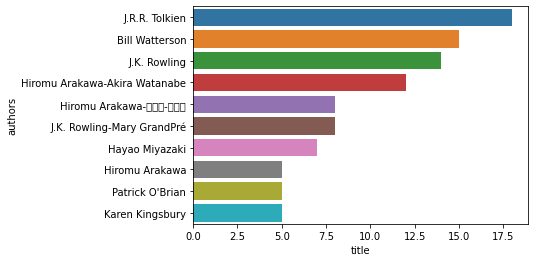

In [ ]:
sns.barplot(highly_rated_author.title,highly_rated_author.index)